In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def preprocessing_n_reading_train():
    # Reading csv files
    train_X = pd.read_csv('train_X.csv')
    
    # Creating dataframes and division into time gaps
    columns = train_X.columns
    essential_columns = ['contract_id', 'report_date', 'specialization_id', 'contract_init_sum', 'contract_date', 'project_id', 'building_id', 'contractor_id', 'contract_current_sum']
    ALL_TIME_COLUMNS = essential_columns + [i for i in columns if "ALL_TIME" in i]
    ll = []
    essential_columns = ['contract_id', 'report_date', 'specialization_id', 'contract_init_sum', 'contract_date', 'project_id', 'building_id', 'contractor_id', 'contract_current_sum', 'agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME', 'agg_all_contracts__g_contract__abs_change_price_last_ds__isMain__last__ALL_TIME', 'agg_all_contracts__g_contract__abs_change_price_last_ds__isMain__mean__ALL_TIME', 'agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME', 'agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__mean__ALL_TIME']
    time_gaps = ['1W', '2W', '3W', '4W', '5W', '6W', '7W', '8W', '12W', '26W', '52W', '1M', '2M', '3M', '4M', '5M', '6M', '7M', '8M', '12M', '12_24M', '12_36M', '12_48M']
    for i in time_gaps:
        ll.append(essential_columns + [j for j in columns if i in j])
    time_gaps_dataframes = {}
    for i in range(len(ll)):
        time_gaps_dataframes[time_gaps[i]] = train_X[ll[i]]
    time_gaps_dataframes['ALL_TIME'] = train_X[ALL_TIME_COLUMNS]
    return time_gaps_dataframes

def preprocessing_n_reading_test():
    # Reading csv files
    test_X = pd.read_csv('test1_X.csv')
    
    # Creating dataframes and division into time gaps
    columns = test_X.columns
    essential_columns = ['contract_id', 'report_date', 'specialization_id', 'contract_init_sum', 'contract_date', 'project_id', 'building_id', 'contractor_id', 'contract_current_sum']
    ALL_TIME_COLUMNS = essential_columns + [i for i in columns if "ALL_TIME" in i]
    ll = []
    essential_columns = ['contract_id', 'report_date', 'specialization_id', 'contract_init_sum', 'contract_date', 'project_id', 'building_id', 'contractor_id', 'contract_current_sum', 'agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME', 'agg_all_contracts__g_contract__abs_change_price_last_ds__isMain__last__ALL_TIME', 'agg_all_contracts__g_contract__abs_change_price_last_ds__isMain__mean__ALL_TIME', 'agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME', 'agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__mean__ALL_TIME']
    time_gaps = ['1W', '2W', '3W', '4W', '5W', '6W', '7W', '8W', '12W', '26W', '52W', '1M', '2M', '3M', '4M', '5M', '6M', '7M', '8M', '12M', '12_24M', '12_36M', '12_48M']
    for i in time_gaps:
        ll.append(essential_columns + [j for j in columns if i in j])
    time_gaps_dataframes = {}
    for i in range(len(ll)):
        time_gaps_dataframes[time_gaps[i]] = test_X[ll[i]]
    time_gaps_dataframes['ALL_TIME'] = test_X[ALL_TIME_COLUMNS]
    return time_gaps_dataframes

def nans_checker(df):
    s = 0
    nans = df.isna().sum().tolist()
    for i in range(len(nans)):
        if nans[i] != 0:
            s += 1
            print(f"Column index: {i}\nQuantity of nans: {nans[i]}\nColumn name: {df.columns[i]}\n")

    print(s, max(nans), df.shape[0])

In [2]:
dataframes_train = preprocessing_n_reading_train()
dataframes_test = preprocessing_n_reading_test()

In [3]:
train_y = pd.read_csv('train_y.csv')
train_y

,contract_id,report_date,default6
0,5433,2023-01-01,0
1,6875,2023-01-01,0
2,1476,2023-01-01,0
3,4469,2023-01-01,0
4,1330,2023-01-01,0
...,...,...,...
28826,5078,2023-07-23,0
28827,3854,2023-07-23,0
28828,5351,2023-07-23,0
28829,57,2023-07-23,0


In [4]:
df_ALL_TIME = dataframes_train['ALL_TIME']
directors = df_ALL_TIME[['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME', 'contract_id', 'report_date']].dropna(subset='agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME')
directors

,agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME,contract_id,report_date
0,-0.145357,5433,2023-01-01
1,-0.145357,6875,2023-01-01
2,-0.145357,1476,2023-01-01
3,-0.145357,4469,2023-01-01
4,-0.145357,1330,2023-01-01
...,...,...,...
28826,-0.145357,5078,2023-07-23
28827,-0.145357,3854,2023-07-23
28828,-0.145357,5351,2023-07-23
28829,-0.145357,57,2023-07-23


In [5]:
dataset = pd.merge(directors, train_y, how='inner', on=['contract_id', 'report_date'])
dataset['default6'].value_counts()

default6
0    23150
1     4556
Name: count, dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27706 entries, 0 to 27705
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME  27706 non-null  float64
 1   contract_id                                                27706 non-null  int64  
 2   report_date                                                27706 non-null  object 
 3   default6                                                   27706 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 865.9+ KB


In [7]:
# Доли дефолтов в каждой группе
group_0 = (dataset[dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME']==dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME'].unique()[0]]['default6']==1).sum()/dataset[dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME']==dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME'].unique()[0]].shape[0]
group_1 = (dataset[dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME']==dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME'].unique()[1]]['default6']==1).sum()/dataset[dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME']==dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME'].unique()[1]].shape[0]
group_2 = (dataset[dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME']==dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME'].unique()[2]]['default6']==1).sum()/dataset[dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME']==dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME'].unique()[2]].shape[0]
print(f"Доли дефолтов по группам:\nГруппа: {dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME'].unique()[0]}\tДоля: {group_0}\nГруппа: {dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME'].unique()[1]}\tДоля: {group_1}\nГруппа: {dataset['agg_BoardOfDirectors__g_contractor__Name__count__ALL_TIME'].unique()[2]}\tДоля: {group_2}")

Доли дефолтов по группам:
Группа: -0.1453566808100576	Доля: 0.1675061583146439
Группа: 6.940348395530606	Доля: 0.0
Группа: 4.283208991902857	Доля: 0.0


In [8]:
first_value = [-0.145357 for i in range(27199)]
second_value = [6.940348 for i in range(490)]
third_value = [4.283209 for i in range(17)]

In [9]:
#  Общее количество заявок на сдачу работ контрагента за все время
req_for_work_submissions = df_ALL_TIME['counteragent_sum_agg_cec_requests__g_contract__request_id__all__count__ALL_TIME']
#  Общая сумма принятых заявок на сдачу работ контрагента за все время
accepted_submissions = df_ALL_TIME['counteragent_sum_agg_cec_requests__g_contract__total_sum_accepted__all__sum__ALL_TIME']

In [10]:
req_for_work_submissions.nunique()

1230

In [11]:
accepted_submissions.nunique()

3920

In [12]:
# Общее количество контрактов за все время
contract_num = df_ALL_TIME[['agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME', 'contract_id', 'report_date']].sort_values(by='agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME')
sorted(contract_num['agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME'].unique())

[np.float64(-0.5390303368497585),
 np.float64(0.7436729085397759),
 np.float64(2.02637615392931),
 np.float64(3.3090793993188443),
 np.float64(4.5917826447083785),
 np.float64(5.874485890097913),
 np.float64(7.157189135487447)]

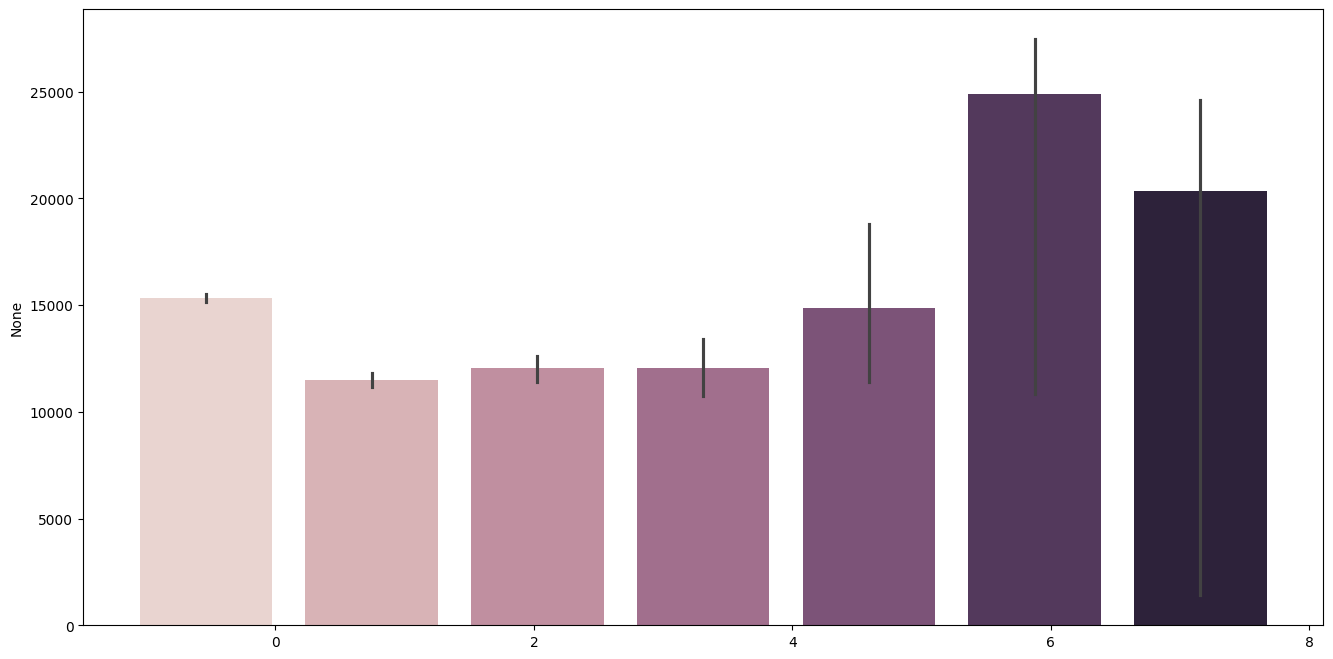

In [13]:
plt.figure(figsize=(16, 8))
sns.barplot(x=contract_num['agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME'].values, y=contract_num['agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME'].index, hue=contract_num['agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME'].values, estimator="median", native_scale=True)
plt.show()

In [14]:
# из-за того, что данные закодированы мы можем лишь предположить, что классы были расположены по порядку возрастания, на этом предположении можно проверить следующее, чем больше контрактов у компании, тем меньшая вероятность дефолта. Теперь нам просто нужно рассмотреть долю дефолта в каждой группе
contract_num = pd.merge(contract_num, train_y, how='inner', on=['contract_id', 'report_date'])
values_contract = contract_num['agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME'].unique()


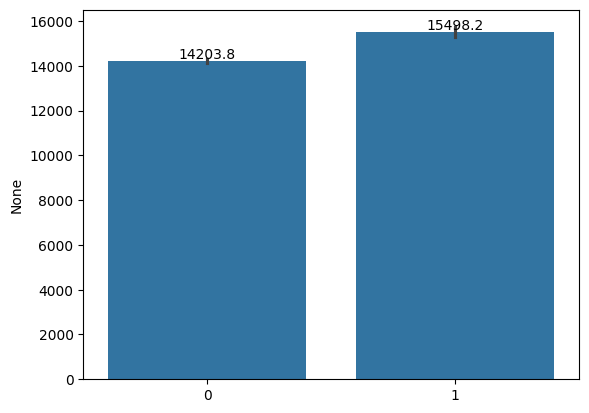

In [15]:
ax = sns.barplot(x = contract_num.default6.values, y = contract_num.default6.index)
ax.bar_label(ax.containers[0], fontsize=10)
plt.show()

In [41]:
# 'agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME' (количество контрактов)
# и 'default6' (индикатор дефолта: 1 — дефолт, 0 — нет)

# Группируем по количеству контрактов и считаем долю дефолтов в каждой группе
defaults_in_contract_groups = contract_num.groupby('agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME')['default6'].mean()

# Преобразуем Series в словарь, если необходимо
defaults_in_contract_groups = defaults_in_contract_groups.to_dict()

defaults_in_contract_groups

{-0.5390303368497585: 0.15834535386906146,
 0.7436729085397759: 0.17501375894331314,
 2.02637615392931: 0.205,
 3.3090793993188443: 0.14824120603015076,
 4.5917826447083785: 0.012987012987012988,
 5.874485890097913: 0.0,
 7.157189135487447: 0.0}

In [26]:
for i in dataframes_train.keys():
    if 'agg_all_contracts__g_contract__bit_da_guid__isMain__count' in dataframes_train[i].columns:
        print(i)

In [39]:
dataframes_train['1W'].columns

Index(['contract_id', 'report_date', 'specialization_id', 'contract_init_sum',
       'contract_date', 'project_id', 'building_id', 'contractor_id',
       'contract_current_sum',
       'agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME',
       'agg_all_contracts__g_contract__abs_change_price_last_ds__isMain__last__ALL_TIME',
       'agg_all_contracts__g_contract__abs_change_price_last_ds__isMain__mean__ALL_TIME',
       'agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__last__ALL_TIME',
       'agg_all_contracts__g_contract__rel_change_price_last_ds__isMain__mean__ALL_TIME',
       'agg_cec_requests__g_contract__request_id__all__count__1W',
       'agg_cec_requests__g_contract__total_sum_accepted__all__sum__1W',
       'agg_payments__g_contract__sum__all__countDistinct__1W',
       'agg_payments__g_contract__sum__all__sum__1W',
       'agg_ks2__g_contract__id__all__count__1W',
       'agg_ks2__g_contract__total_sum__all__sum__1W',
       'agg_spass_a

In [163]:
money_cols = ['contract_id', 'report_date', 'agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME', 'agg_Finance__g_contractor__Value__CostPrice_y__last__ALL_TIME', 'agg_FinanceAndTaxesFTS__g_contractor__Expenses__last__ALL_TIME', 'agg_FinanceAndTaxesFTS__g_contractor__Income__last__ALL_TIME', 'agg_FinanceAndTaxesFTS__g_contractor__TaxArrearsSum__last__ALL_TIME', 'agg_FinanceAndTaxesFTS__g_contractor__TaxPenaltiesSum__last__ALL_TIME', 'agg_FinanceAndTaxesFTS__g_contractor__TaxesSum__last__ALL_TIME', 'agg_Finance__g_contractor__Value__LongLiabilities__last__ALL_TIME', 'agg_Finance__g_contractor__Value__ShortLiabilities__last__ALL_TIME', 'agg_Finance__g_contractor__Value__Balance__last__ALL_TIME', 'agg_Finance__g_contractor__Value__Revenue_y__last__ALL_TIME', 'contract_current_sum', 'agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME', 'agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME', 'agg_materials__g_contract__material_id__countDistinct__ALL_TIME']
money_cols
money_df = pd.merge(df_ALL_TIME[money_cols], train_y, how='inner', on=['contract_id', 'report_date'])
money_df.isna().sum()

contract_id                                                                  0
report_date                                                                  0
agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME             3515
agg_Finance__g_contractor__Value__CostPrice_y__last__ALL_TIME             3515
agg_FinanceAndTaxesFTS__g_contractor__Expenses__last__ALL_TIME            4004
agg_FinanceAndTaxesFTS__g_contractor__Income__last__ALL_TIME              4004
agg_FinanceAndTaxesFTS__g_contractor__TaxArrearsSum__last__ALL_TIME      18993
agg_FinanceAndTaxesFTS__g_contractor__TaxPenaltiesSum__last__ALL_TIME    25425
agg_FinanceAndTaxesFTS__g_contractor__TaxesSum__last__ALL_TIME            4007
agg_Finance__g_contractor__Value__LongLiabilities__last__ALL_TIME         9380
agg_Finance__g_contractor__Value__ShortLiabilities__last__ALL_TIME        3498
agg_Finance__g_contractor__Value__Balance__last__ALL_TIME                 3471
agg_Finance__g_contractor__Value__Revenue_y__last__A

<Axes: xlabel='agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME', ylabel='Count'>

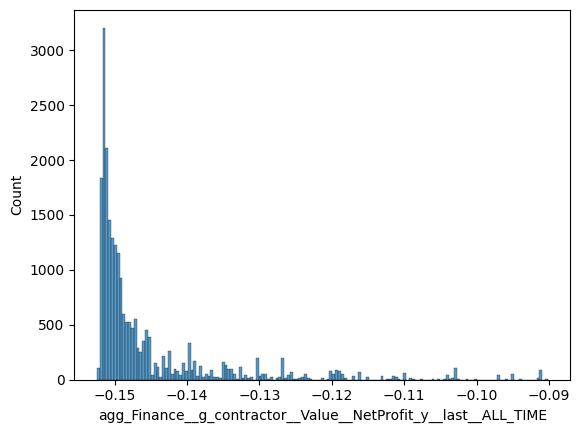

In [139]:
'''
Подрядчик с большей чистой прибылью за год будет надежнее, чем с меньшей
''';
money_df1 = money_df[['contract_id', 'report_date', 'agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME', 'default6']]
Clear_Income = money_df1['agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME']
sns.histplot(data=money_df1[(money_df1['agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME'] < Clear_Income.quantile(0.95)) & (money_df1['agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME'] > Clear_Income.quantile(0.05))], x = 'agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME')

In [93]:
cleared_data = money_df1[(money_df1['agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME'] < Clear_Income.quantile(0.95)) & (money_df1['agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME'] > Clear_Income.quantile(0.05))]
cleared_data[cleared_data['agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME'] < -0.145]

,contract_id,report_date,agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME,default6
14,2130,2023-01-01,-0.147879,0
15,3765,2023-01-01,-0.147879,1
16,3651,2023-01-01,-0.147879,0
17,6,2023-01-01,-0.147879,0
19,5462,2023-01-01,-0.151229,0
...,...,...,...,...
28814,5271,2023-07-23,-0.147224,0
28815,3382,2023-07-23,-0.151229,0
28819,5465,2023-07-23,-0.151229,0
28820,6647,2023-07-23,-0.151229,1


In [117]:
intervals = {
    '-0.155--0.145': (-0.155, -0.145),
    # '0.4-0.6': (0.4, 0.6),
    '-0.145--0.135': (-0.145, -0.135),
    '-0.135--0.125': (-0.135, -0.125),
    '-0.125--0.115': (-0.125, -0.115),
    '-0.115--0.09': (-0.115,-0.09),
    #'0.80-0.82': (0.8,0.82),
    #'0.82-0.84': (0.82,0.84),
    #'0.84-0.86': (0.84,0.86),
    #'0.86-0.88': (0.86,0.88),
    #'0.88-0.9': (0.88,0.9),
    # '1.2-1.4': (1.2, 1.4),
    # '1.4-1.6': (1.4, 1.6)
}


def get_segment(value): ### функция для присвоение бакета
    for segment, (min_value, max_value) in intervals.items():
        if min_value <= value < max_value:
            return segment
    return 'Other'

cleared_data['segments'] = cleared_data['agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME'].apply(get_segment) ### создаем колонку с категорильной перменной, по бакетам

/tmp/ipykernel_4277/3214947323.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleared_data['segments'] = cleared_data['agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME'].apply(get_segment) ### создаем колонку с категорильной перменной, по бакетам


<Axes: xlabel='agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME', ylabel='Count'>

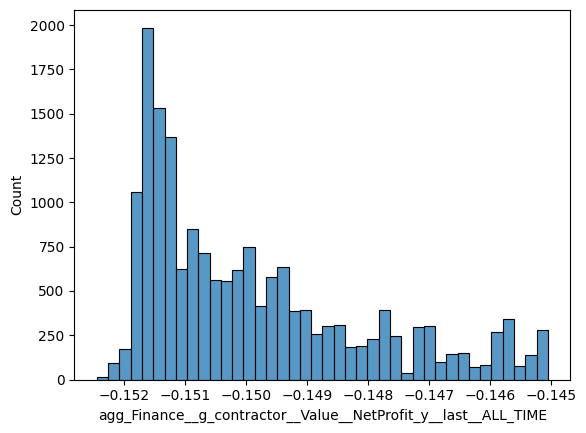

In [118]:
sns.histplot(cleared_data[cleared_data['segments'] == '-0.155--0.145'].agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME)

<Axes: xlabel='agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME', ylabel='Count'>

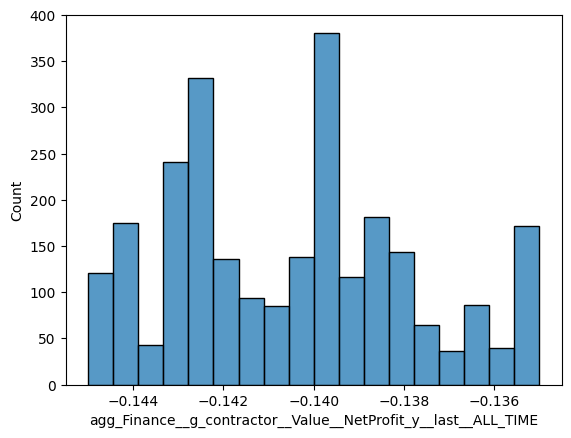

In [119]:
sns.histplot(cleared_data[cleared_data['segments'] == '-0.145--0.135'].agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME)

<Axes: xlabel='agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME', ylabel='Count'>

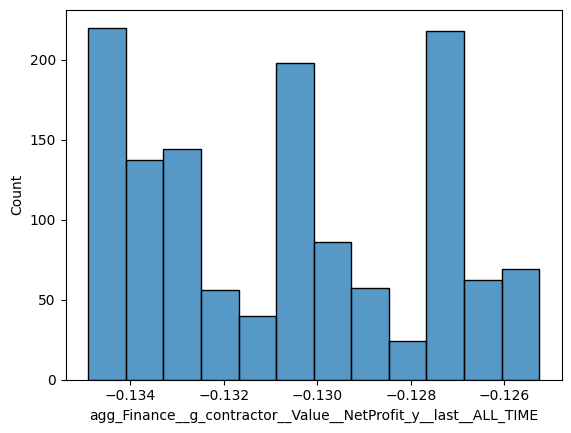

In [120]:
sns.histplot(cleared_data[cleared_data['segments'] == '-0.135--0.125'].agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME)

<Axes: xlabel='agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME', ylabel='Count'>

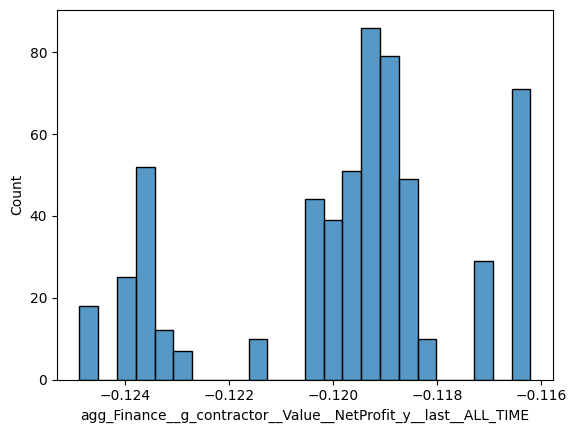

In [121]:
sns.histplot(cleared_data[cleared_data['segments'] == '-0.125--0.115'].agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME)

<Axes: xlabel='agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME', ylabel='Count'>

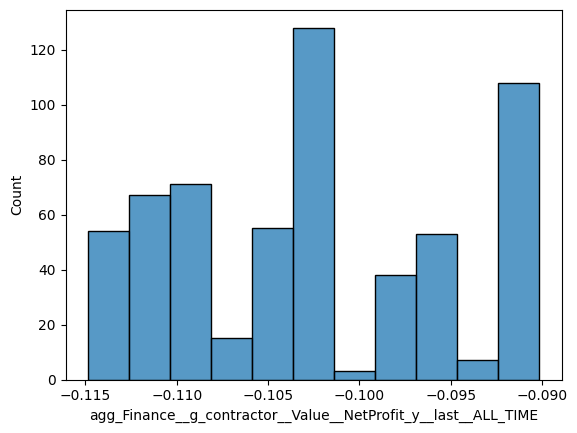

In [123]:
sns.histplot(cleared_data[cleared_data['segments'] == '-0.115--0.09'].agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME)

In [138]:
# Проверено
segms = cleared_data['segments'].unique()
segms_default_rate = {}
for i in segms:
    segment = cleared_data[cleared_data.segments == i]
    segms_default_rate[i] = segment[segment['default6'] == 1].shape[0]/segment.shape[0]
segms_default_rate

{'-0.135--0.125': 0.18764302059496568,
 '-0.155--0.145': 0.1792074170388377,
 '-0.125--0.115': 0.05326460481099656,
 '-0.115--0.09': 0.14357262103505844,
 '-0.145--0.135': 0.19110251450676982}

In [133]:
cleared_data.agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME

0       -0.126966
1       -0.126966
2       -0.126966
3       -0.130052
4       -0.130052
           ...   
28814   -0.147224
28815   -0.151229
28819   -0.151229
28820   -0.151229
28821   -0.151229
Name: agg_Finance__g_contractor__Value__NetProfit_y__last__ALL_TIME, Length: 22766, dtype: float64

In [161]:
'''
Если у подрядчика больше долгосрочных обязательств, то сумма контрактов больше и подрядчик надёжнее
agg_Finance__g_contractor__Value__LongLiabilities__last__ALL_TIME - долгосрочные обязательства
agg_Finance__g_contractor__Value__ShortLiabilities__last__ALL_TIME - краткосрочные обязательства
''';
money_df2 = money_df[['contract_id', 'report_date', 'agg_Finance__g_contractor__Value__LongLiabilities__last__ALL_TIME', 'agg_Finance__g_contractor__Value__ShortLiabilities__last__ALL_TIME', 'contract_current_sum', 'agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME', 'default6']].dropna()
money_df2

,contract_id,report_date,agg_Finance__g_contractor__Value__LongLiabilities__last__ALL_TIME,agg_Finance__g_contractor__Value__ShortLiabilities__last__ALL_TIME,contract_current_sum,agg_all_contracts__g_contract__bit_da_guid__isMain__count__ALL_TIME,default6
0,5433,2023-01-01,-0.154057,-0.117770,0.793952,-0.539030,0
1,6875,2023-01-01,-0.154057,-0.117770,2.681675,0.743673,0
2,1476,2023-01-01,-0.154057,-0.117770,-0.416432,-0.539030,0
3,4469,2023-01-01,-0.002898,0.000281,-0.193827,-0.539030,0
4,1330,2023-01-01,-0.002898,0.000281,0.133446,0.743673,0
...,...,...,...,...,...,...,...
28826,5078,2023-07-23,0.155508,-0.171700,-0.504509,0.743673,0
28827,3854,2023-07-23,0.155508,-0.171700,-0.524174,0.743673,0
28828,5351,2023-07-23,0.155508,-0.171700,-0.515112,-0.539030,0
28829,57,2023-07-23,0.155508,-0.171700,-0.504737,-0.539030,0


<Axes: xlabel='agg_Finance__g_contractor__Value__LongLiabilities__last__ALL_TIME', ylabel='contract_current_sum'>

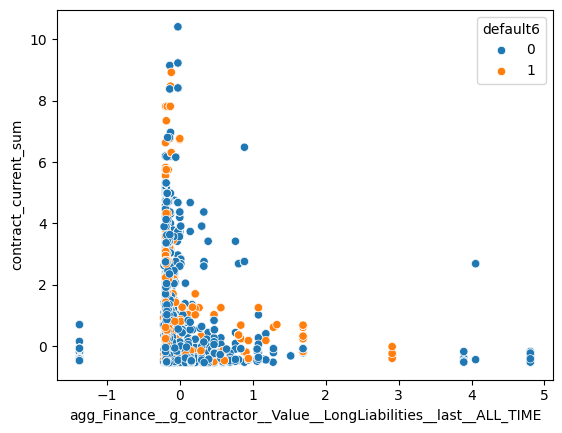

In [373]:
sns.scatterplot(data = money_df2, x = 'agg_Finance__g_contractor__Value__LongLiabilities__last__ALL_TIME', y = 'contract_current_sum', hue = 'default6')

In [167]:
money_df3 = money_df[['contract_id', 'report_date', 'agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME', 'agg_materials__g_contract__material_id__countDistinct__ALL_TIME', 'contract_current_sum', 'default6']]

In [369]:
'''
Чем больше уникальных материалов по контракту, тем больше сумма контракта
'''
money_df3

,contract_id,report_date,agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME,agg_materials__g_contract__material_id__countDistinct__ALL_TIME,contract_current_sum,default6
0,5433,2023-01-01,5.222766,6.111811,0.793952,0
1,6875,2023-01-01,3.387956,5.004645,2.681675,0
2,1476,2023-01-01,-0.281663,0.308738,-0.416432,0
3,4469,2023-01-01,-0.159342,-0.187578,-0.193827,0
4,1330,2023-01-01,-0.159342,-0.034865,0.133446,0
...,...,...,...,...,...,...
28826,5078,2023-07-23,-0.403984,-0.340290,-0.504509,0
28827,3854,2023-07-23,-0.403984,-0.340290,-0.524174,0
28828,5351,2023-07-23,-0.403984,-0.340290,-0.515112,0
28829,57,2023-07-23,-0.403984,-0.340290,-0.504737,0


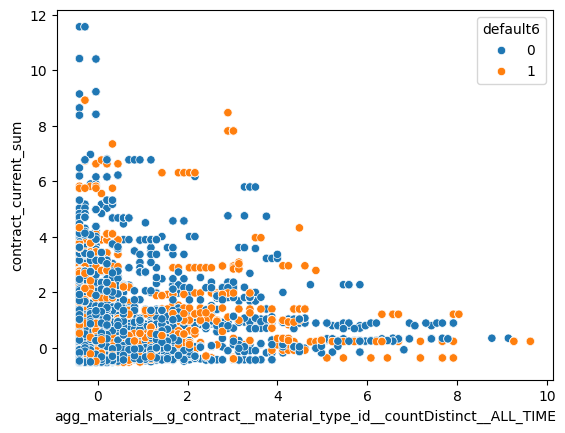

In [375]:
sns.scatterplot(data = money_df3, x = 'agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME', y = 'contract_current_sum', legend=True, hue = 'default6')
plt.show()
# Зависимости нет

In [387]:
# money_df3[(money_df3['agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME'] >= 0) & (money_df3['contract_current_sum'] >= 0)]

,contract_id,report_date,agg_materials__g_contract__material_type_id__countDistinct__ALL_TIME,agg_materials__g_contract__material_id__countDistinct__ALL_TIME,contract_current_sum,default6
0,5433,2023-01-01,5.222766,6.111811,0.793952,0
1,6875,2023-01-01,3.387956,5.004645,2.681675,0
10,5143,2023-01-01,0.085299,0.156025,6.766008,1
21,3007,2023-01-01,1.308505,1.301369,1.921837,1
22,2065,2023-01-01,0.941543,1.988575,3.074878,0
...,...,...,...,...,...,...
28807,3870,2023-07-23,2.042429,2.675781,0.119172,1
28808,5580,2023-07-23,3.020994,4.470152,0.231946,0
28809,1190,2023-07-23,3.020994,2.217643,1.132345,0
28820,6647,2023-07-23,2.164750,2.294000,0.610944,1


<Axes: xlabel='contract_current_sum', ylabel='Count'>

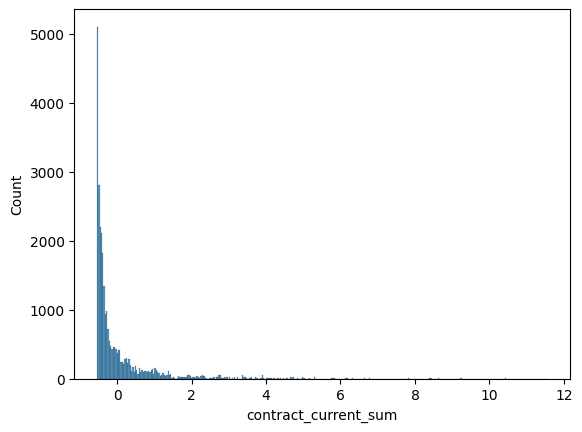

In [395]:
'''
Чем больше сумма контракта, тем меньшая вероятность дефолта
'''
money_df4 = money_df[['contract_id', 'report_date', 'contract_current_sum', 'default6']]
sns.histplot(money_df4.contract_current_sum)

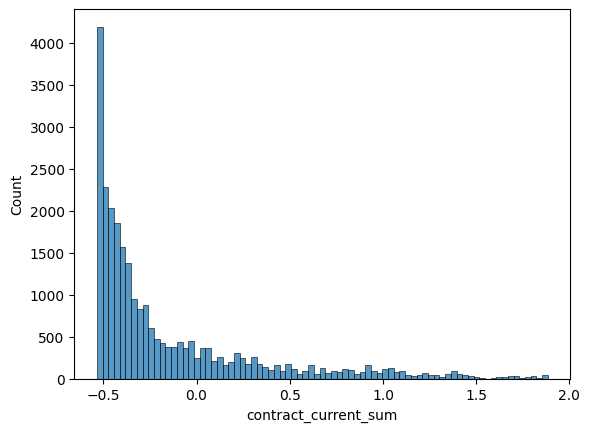

In [409]:
quantile_lower = money_df4.contract_current_sum.quantile(0.05)
quantile_higher = money_df4.contract_current_sum.quantile(0.95)
gyp_df1 = money_df4[(money_df4.contract_current_sum > quantile_lower) & (money_df4.contract_current_sum < quantile_higher)]
sns.histplot(gyp_df1, x = 'contract_current_sum')
plt.show()

In [412]:
intervals = {
    '-0.55--0.3': (-0.55, -0.3),
    '-0.3-0': (-0.3, 0),
    '0-0.5': (0, 0.5),
    '0.5-1': (0.5, 1),
    '1-2': (1, 2),
    #'0.80-0.82': (0.8,0.82),
    #'0.82-0.84': (0.82,0.84),
    #'0.84-0.86': (0.84,0.86),
    #'0.86-0.88': (0.86,0.88),
    #'0.88-0.9': (0.88,0.9),
    # '1.2-1.4': (1.2, 1.4),
    # '1.4-1.6': (1.4, 1.6)
}


def get_segment(value): ### функция для присвоение бакета
    for segment, (min_value, max_value) in intervals.items():
        if min_value <= value < max_value:
            return segment
    return 'Other'

gyp_df1['segments'] = gyp_df1['contract_current_sum'].apply(get_segment) ### создаем колонку с категорильной перменной, по бакетам

/tmp/ipykernel_4277/2754303901.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gyp_df1['segments'] = gyp_df1['contract_current_sum'].apply(get_segment) ### создаем колонку с категорильной перменной, по бакетам


/tmp/ipykernel_4277/2892872330.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = gyp_df1.segments, y=gyp_df1.default6.values, palette='YlGnBu', native_scale=True)


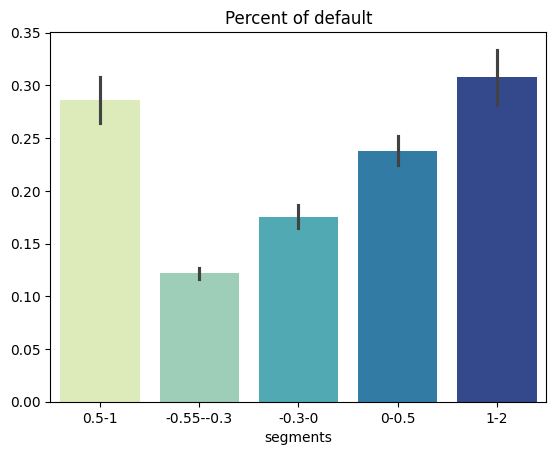

In [423]:
sns.barplot(x = gyp_df1.segments, y=gyp_df1.default6.values, palette='YlGnBu', native_scale=True)
plt.title("Percent of default")
plt.show()